In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SAD/POSE-205.xlsx')
df = df.dropna()

In [4]:
print(df['name'].value_counts())

name
PUBLICZNA SZKOŁA PODSTAWOWA IM. JANUSZA KORCZAKA W JASIENICY                            1066
SZKOŁA PODSTAWOWA NR 4 IM. BOHATERÓW SPOD DARNICY W PIASTOWIE                            998
SZKOŁA PODSTAWOWA IM. KARDYNAŁA STEFANA WYSZYŃSKIEGO W SZULBORZU WIELKIM                 544
SZKOŁA PODSTAWOWA NR 5 IM. MIKOŁAJA KOPERNIKA W WADOWICACH                               538
SZKOŁA PODSTAWOWA IM. KARDYNAŁA STEFANA WYSZYŃSKIEGO W KRYSPINOWIE                       538
                                                                                        ... 
ZESPÓŁ SZKÓŁ PUBLICZNYCH, SZKOŁA PODSTAWOWA IM. STANISŁAWA WYSPIAŃSKIEGO W RYMANOWIE      13
SZKOŁA PODSTAWOWA NR 2 IM. KAZIMIERZA WIELKIEGO W OPOCZNIE                                 8
SZKOŁA PODSTAWOWA SPECJALNA NR 24 W PŁOCKU                                                 8
SZKOŁA PODSTAWOWA IM.MJR. JÓZEFA WIŚNIEWSKIEGO W LUTKÓWCE                                  7
ZESPÓŁ SZKÓŁ SAMORZĄDOWYCH NR 1 W OPOCZNIE                       

In [5]:
#Wybór jednej placówki
df_miasto = df[df['name'] == 'PUBLICZNA SZKOŁA PODSTAWOWA IM. JANUSZA KORCZAKA W JASIENICY']

In [6]:
#df_miasto['date'] = pd.to_datetime(df['date']).astype(int)

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


df_miasto.drop('city', axis=1, inplace=True)
df_miasto.drop('rspo', axis=1, inplace=True)
df_miasto.drop('name', axis=1, inplace=True)

df_miasto.drop('pm10_max', axis=1, inplace=True)
df_miasto.drop('pm10_min', axis=1, inplace=True)

df_miasto['date'] = pd.to_datetime(df_miasto['date'])
df_miasto.set_index('date', inplace=True)

<ipython-input-6-979705ba8c8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miasto.drop('city', axis=1, inplace=True)
<ipython-input-6-979705ba8c8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miasto.drop('rspo', axis=1, inplace=True)
<ipython-input-6-979705ba8c8e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miasto.drop('name', axis=1, inplace=True)
<ipython-input-6-979705ba8c8e>:12: SettingWithCopyWarning: 
A v

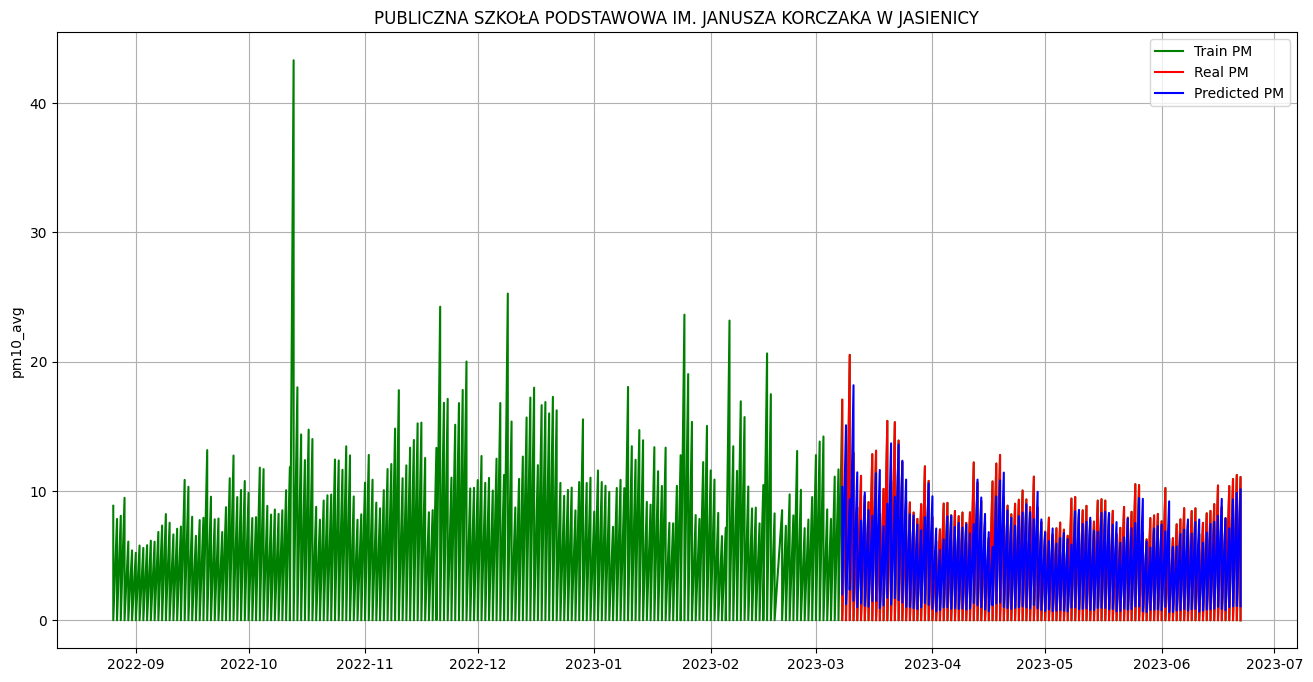

In [8]:
train_data, test_data = df_miasto[0:int(len(df_miasto)*0.8)], df_miasto[int(len(df_miasto)*0.8):]

cecha = 'pm10_avg'
train_arima = train_data[cecha] #dane treningowe / naszą badana etykietą jest pm10
test_arima = test_data[cecha] #  dane testowe

history = [x for x in train_arima]
y = test_arima

predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])


for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)


import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df_miasto.index[-600:], df_miasto[cecha].tail(600), color='green', label = 'Train PM')
plt.plot(test_data.index, y, color = 'red', label = 'Real PM')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted PM')
plt.title('PUBLICZNA SZKOŁA PODSTAWOWA IM. JANUSZA KORCZAKA W JASIENICY')
plt.ylabel(cecha)
plt.legend()
plt.grid(True)
plt.show()

SHAP jest zwykle używany do wyjaśniania wyników modeli uczenia maszynowego, takich jak regresja, drzewa decyzyjne, lasy losowe czy modele typu XGBoost. ARIMA, będąc modelem szeregów czasowych, nie jest bezpośrednio wspierany przez SHAP.